# Домашняя работа - логистическая регрессия

ДАНИЛЬЧЕНКО ВАДИМ

Имеются данные adult.csv (см. в материалах к занятию)

Целевой переменной является уровень дохода income (крайний правый столбец).

Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Вам необходимо построить модель логистической регрессии, которая предсказывает уровень дохода человека. При возможности попробуйте улучшить точность предсказаний (метод score) с помощью перебора признаков.

In [1]:
import pandas as pd
data=pd.read_csv('data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [3]:
data['target']=data.income.apply(lambda x: 0 if x=='<=50K' else 1)

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
target             48842 non-null int64
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [6]:
# посмотрим на workclass
data.workclass.value_counts(normalize=True)

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

In [7]:
# разделим на 2 группы Private и others
def group_workclasses(classes):
    if classes=='Private':
        return 'Private'
    else:
        return 'Others'
data['workclass_cat']=data.workclass.apply(group_workclasses)

In [8]:
# посмотрим на education
data.education.value_counts(normalize=True)

HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64

In [9]:
# разделим education
def group_education(classes):
    if classes=='HS-grad':
        return 'HS-grad'
    elif classes=='Some-college':
        return 'Some-college' 
    elif classes=='Bachelors':
        return 'Bachelors' 
    else:
        return 'Others'
data['education_cat']=data.education.apply(group_education)

In [10]:
# посмотрим на education-num
data['educational-num'].value_counts(normalize=True)

9     0.323164
10    0.222718
13    0.164305
14    0.054400
11    0.042197
7     0.037099
12    0.032779
6     0.028439
4     0.019553
15    0.017075
5     0.015478
8     0.013452
16    0.012162
3     0.010421
2     0.005057
1     0.001699
Name: educational-num, dtype: float64

In [11]:
# разделим education-num
def group_education_num(classes):
    if classes==9:
        return '9'
    elif classes==10:
        return '10'
    elif classes==13:
        return '13'
    else:
        return 'Others'
data['educational_num_cat']=data['educational-num'].apply(group_education_num)

In [12]:
# посмотрим на education-num
data['marital-status'].value_counts(normalize=True)

Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64

In [13]:
# разделим education
def group_marital(classes):
    if classes=='Married-civ-spouse':
        return 'Married-civ-spouse'
    elif classes=='Never-married':
        return 'Never-married'
    elif classes=='Divorced':
        return 'Divorced'
    else:
        return 'Others'
data['marital_status_cat']=data['marital-status'].apply(group_marital)

In [14]:
# посмотрим на occupation
occup=data['occupation'].value_counts(normalize=True).reset_index()
occup=occup[occup.iloc[:,-1]<.1].index.tolist()

In [15]:
# разделим occupation
def group_occupation(classes):
    if classes not in occup:
        return str(classes)
    else:
        return 'Others'
data['occupation_cat']=data['occupation'].apply(group_occupation)

In [16]:
# посмотрим на hours-per-week
data['hours-per-week'].value_counts(normalize=True).head(10)

40    0.466873
50    0.086933
45    0.055628
60    0.044572
35    0.039658
20    0.038123
30    0.034806
55    0.021518
25    0.019614
48    0.015765
Name: hours-per-week, dtype: float64

In [17]:
# разделим на 40ка часовую рабочую неделю и остальное
def group_work_hours(classes):
    if classes==40:
        return '40'
    else:
        return 'Others'
data['hours_per_week_cat']=data['hours-per-week'].apply(group_work_hours)

In [18]:
# посмотрим на native-country
data['native-country'].value_counts(normalize=True).head(10)

United-States    0.897424
Mexico           0.019471
?                0.017546
Philippines      0.006040
Germany          0.004218
Puerto-Rico      0.003767
Canada           0.003726
El-Salvador      0.003173
India            0.003092
Cuba             0.002825
Name: native-country, dtype: float64

In [19]:
# разделим native-country на US и остальные
def group_native(classes):
    if classes=='United-States':
        return 'United-States'
    else:
        return 'Others'
data['native_country_cat']=data['native-country'].apply(group_work_hours)

In [20]:
# удалим лишние поля
train_df=data.drop(['workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'hours-per-week', \
                    'native-country', 'income', 'fnlwgt'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age                    48842 non-null int64
relationship           48842 non-null object
race                   48842 non-null object
gender                 48842 non-null object
capital-gain           48842 non-null int64
capital-loss           48842 non-null int64
target                 48842 non-null int64
workclass_cat          48842 non-null object
education_cat          48842 non-null object
educational_num_cat    48842 non-null object
marital_status_cat     48842 non-null object
occupation_cat         48842 non-null object
hours_per_week_cat     48842 non-null object
native_country_cat     48842 non-null object
dtypes: int64(4), object(10)
memory usage: 5.2+ MB


In [21]:
# преобразуем категориальные переменные в dummy
train_df=pd.get_dummies(train_df)
train_df.head()

,age,capital-gain,capital-loss,target,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,...,occupation_cat_Other-service,occupation_cat_Priv-house-serv,occupation_cat_Prof-specialty,occupation_cat_Protective-serv,occupation_cat_Sales,occupation_cat_Tech-support,occupation_cat_Transport-moving,hours_per_week_cat_40,hours_per_week_cat_Others,native_country_cat_Others
0,25,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,28,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,44,7688,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,18,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [22]:
# выделим из данных целевую переменную
y=train_df['target']
X=train_df.drop('target', axis=1)

In [23]:
# нормализуем X
from sklearn.preprocessing import StandardScaler
stsc=StandardScaler()
X_sc=stsc.fit_transform(X)

In [24]:
# разделим на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=777)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='neg_log_loss', cv=5, n_jobs=-1)

In [26]:
%%time
gridsearch.fit(data_train, y_train)

Wall time: 12.4 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [27]:
# лучшие праметры
gridsearch.best_params_

{'solver': 'liblinear'}

In [28]:
# обучим логистическую регрессию с нашими параметрами
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

lr=LogisticRegression(random_state=777, solver='liblinear')
lr.fit(data_train, y_train)

y_train_pred=lr.predict(data_train)

print('----------- train ----------------')
print('precision(точность): {}'.format(precision_score(np.array(y_train), np.round(y_train_pred))))
print('recall(полнота): {}'.format(recall_score(np.array(y_train), np.round(y_train_pred))))
print('accuracy: {}'.format(accuracy_score(np.array(y_train), np.round(y_train_pred))))

----------- train ----------------
precision(точность): 0.7111054247697032
recall(полнота): 0.5907110213625253
accuracy: 0.8436516264428122


In [29]:
y_test_pred=lr.predict(data_test)

print('----------- test ----------------')
print('precision(точность): {}'.format(precision_score(np.array(y_test), np.round(y_test_pred))))
print('recall(полнота): {}'.format(recall_score(np.array(y_test), np.round(y_test_pred))))
print('accuracy: {}'.format(accuracy_score(np.array(y_test), np.round(y_test_pred))))

----------- test ----------------
precision(точность): 0.7044025157232704
recall(полнота): 0.5899912203687445
accuracy: 0.8466577950660252


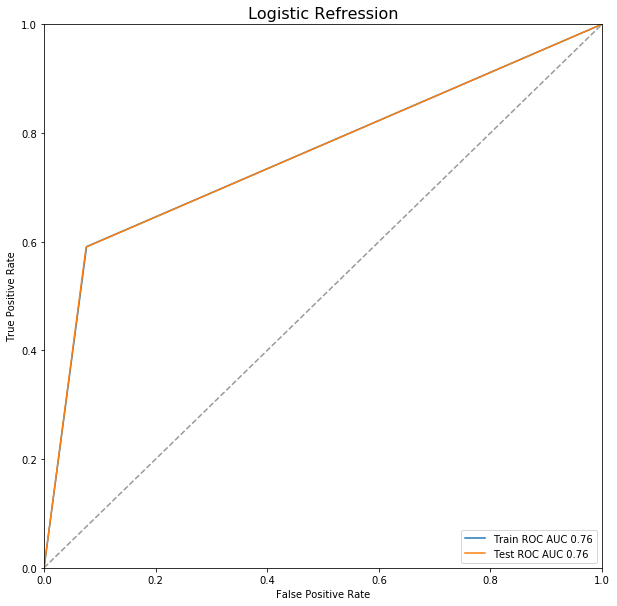

In [32]:
# визуализируем построим график ROC AUC кривой
import matplotlib
import matplotlib.pyplot as plt
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)

roc_auc_train = np.round(roc_auc_score(y_train, y_train_pred), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_pred), 2)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Refression', size=16)
plt.legend(loc='lower right')
plt.show()